## Initialize libraries and import the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")

In [35]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### 10 rows is to be dropped as it contains null value

In [7]:
percent_row_drop = (10/df.shape[0])*100
print("percentage of rows dropped: ", percent_row_drop)

percentage of rows dropped:  2.9069767441860463


In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


### Checking for number of unique values for some columns

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Removing data where sex = "."

In [11]:
df = df[df['sex'] != '.']


## Now Lets Visalize the data

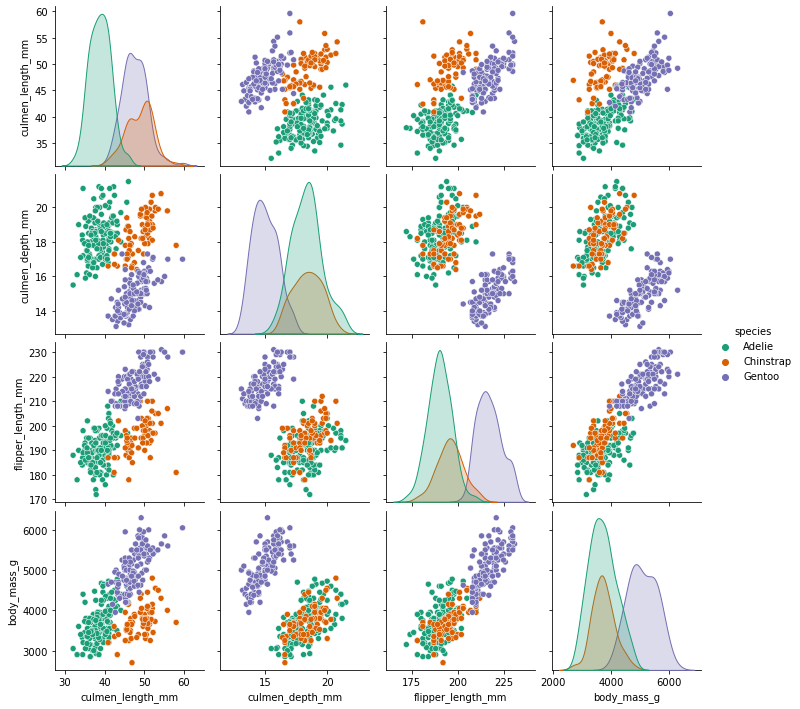

In [16]:
sns.pairplot(df,hue='species',palette='Dark2')

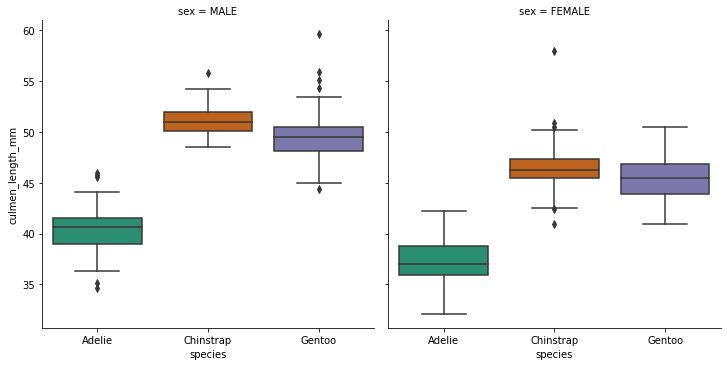

In [17]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

### So, now that we have the data, lets split it into X and y and also convert the categories to seperate columns containing 0 and 1

In [18]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

### Split train and test data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Now train the model with Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()
Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
prediction = Model.predict(X_test)

### Now evaluate the predictions

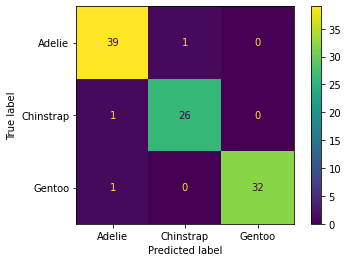

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

confusion_matrix(y_test,prediction)
plot_confusion_matrix(Model,X_test,y_test)

### We can see that almost all the predictions are correct except some are wrongly predicted

### Lets get our classification report

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



### Lets see how important each feature is in predicting the species

In [29]:
pd.DataFrame(index=X.columns,data=Model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.026964
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

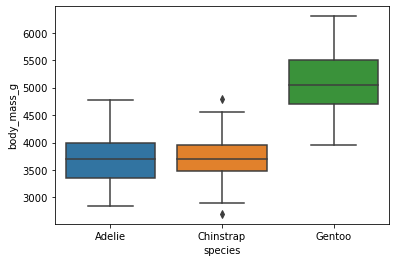

In [30]:
sns.boxplot(x='species',y='body_mass_g',data=df)

### Above graph indates that the body mass has no importance in differenciating first 2 species hence it has 0 importance in table above the graph.

## Finally, lets visualize the decision tree

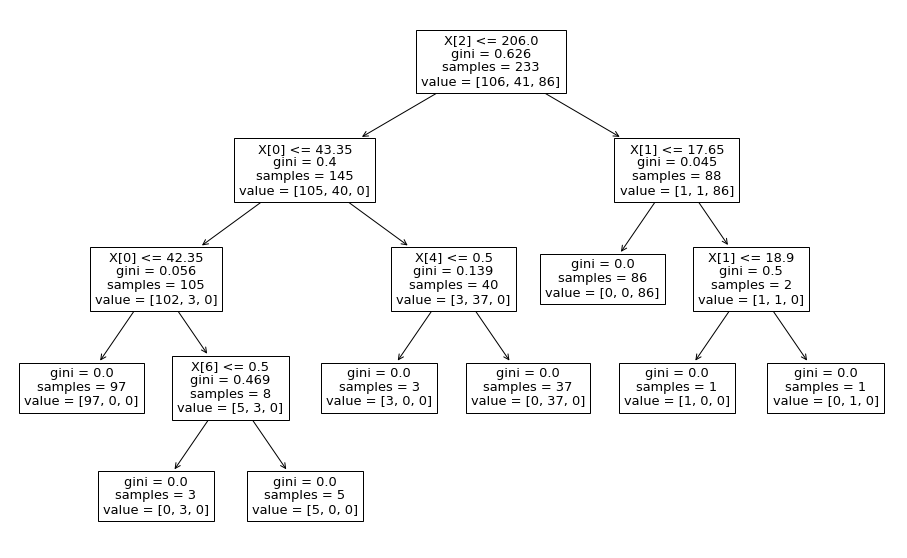

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(Model);